In [3]:
import matplotlib.pyplot as plt
from math import tanh
from scipy.integrate import solve_ivp
import numpy as np

### Dimensionless DE and system
For attractive potential $U(r) = \frac{\alpha}{r} + \beta r^n$, we get a reduced dimensionless equation of motion. Let $t = \frac{r_{0}^{2}\mu}{l}\tau$ and $r = \frac{R}{r_0}$.
$$\frac{\partial^2 R}{\partial \tau^2} = \frac{1}{R^3} + \alpha r_{0} \left(\frac{\mu}{l}\right)^2\frac{1}{R^2} - n \beta r_{0}^{n+2} \left(\frac{\mu}{l}\right)^2 R^{n-1}$$

In [4]:
# define constants
r_0 = 5 # initial mass radius from the attractive mass
mu = 10 # m1m2/(m1+m2) reduced mass of system
l = 4 # initial angular momentum
alpha = 5 # constant to mess with
beta = 5 # constant to mess with
n = 2 # the potential constant power

### Numerically Solve the DE
We need to numerically solve a system of linear ODEs:
$$\frac{\partial R}{\partial \tau} = x$$ which we can plug into our DE:
$$\frac{\partial x}{\partial \tau} = \frac{1}{R^3} + \alpha r_{0} \left(\frac{\mu}{l}\right)^2\frac{1}{R^2} - n \beta r_{0}^{n+2} \left(\frac{\mu}{l}\right)^2 R^{n-1}$$

In [12]:
# numerically solve DE
# using this example from the University of Edinburgh, we can emulate the method:.
# https://media.ed.ac.uk/media/Solving+Differential+Equations+in+PythonA+Higher+order+ODEs+with+solve_ivp/1_c8g7fwhw 
# First we write a function to return coupled derivatives

def vdp_deriv(t,y):
    """ The iterator function we pass in to define how our linear
        system of ODE's is related, based on the markdown cell above.
    """
    R = y[0]
    x = y[1]
    DE = R**(-3) + alpha*r_0*((mu/l)**2)*(R**(-2)) - n*beta*((r_0)**(n+2))*((mu/l)**2)*(R**(n-1))
    return [x, DE]

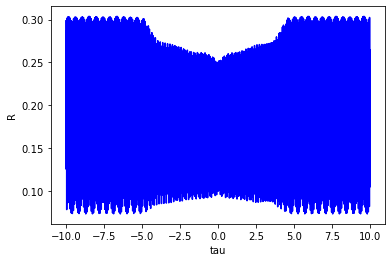

In [13]:
# Now we use the solve_ivp method from scipy to integrate with our relation

t1 = np.linspace(0,-10, 1000)
t2 = np.linspace(0,10, 1000)
sol1 = solve_ivp(fun=vdp_deriv, t_span = [t1[0], t1[-1]], y0=[0.1,10], t_eval=t1)
sol2 = solve_ivp(fun=vdp_deriv, t_span = [t2[0], t2[-1]], y0=[0.1,10], t_eval=t2)

plt.subplots(1,1)
plt.plot(sol1.t, sol1.y[0], 'b')
plt.plot(sol2.t, sol2.y[0], 'b')
plt.xlabel("tau")
plt.ylabel("R")
plt.show()